导包，np  
从numpy.fft导入fft、ifft  
导入图片库PIL中的Image

In [3]:
import numpy as np

#导入傅里叶函数,fft,ifft你操作
# fft傅里叶变换  ifft傅里叶反变换
from numpy.fft import fft,ifft
#真实世界，时域 ndarray
#规律，频域 高低，

from PIL import Image

第一步读取数据

In [4]:
cat = Image.open('cat.png')

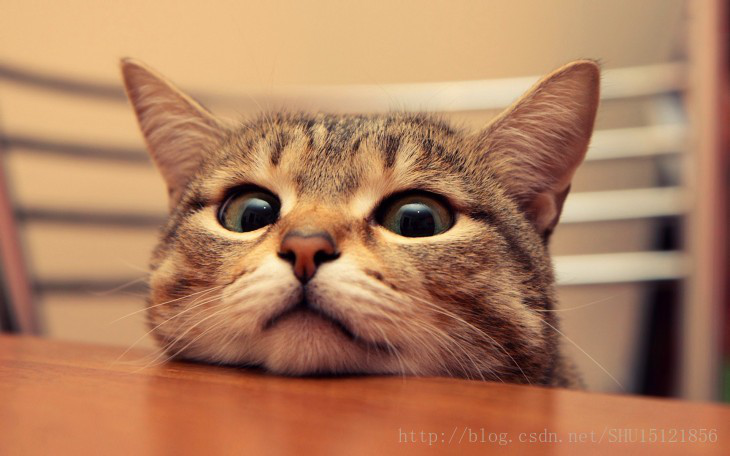

In [5]:
cat

转换成int类型数据，int8 == 128

In [5]:
# fromstring()方法可以将字符串转化成ndarray对象，需要将字符串数字化时这个方法比较有用，可以获得字符串的ascii码序列。
# fromstring() 过时了 需要使用frombuffer
#cat.tobytes()字节，8位 ----->对应最大的数字：-127 - 127
cat_data = np.frombuffer(cat.tobytes(),dtype=np.int8)
display(cat_data.shape,cat_data)

(998640,)

array([ -25,  -70, -125, ...,  -68,   95,   62], dtype=int8)

傅里叶转换,傅里叶转换的结果包含实数，和虚数

In [6]:
cat_data_fft = fft(cat_data)
#真实数据，变换成了频率，频域
cat_data_fft

array([-1569123.        -9.16715531e-12j,
       -7005918.98362136+1.26047833e+07j,
       -2819481.22749805+8.87746379e+06j, ...,
         622731.56198532-2.77534574e+06j,
       -2819481.22749805-8.87746379e+06j,
       -7005918.98362136-1.26047833e+07j])

In [7]:
# -7005918.98362136+12604783.28030717j 实数+虚数

# x^2 = 4 ---> -2 / 2
# x^2 = -4 --->虚数

滤波：将傅里叶的数据去除低频的波,设置为0   滤除低频的信号 保留高频的信号  这样就保留了轮廓
np.where(np.abs(fft_result)<1e5,0,fft_result)

In [8]:
#条件
cond = np.abs(cat_data_fft)<1e5  # 100000

#根据条件获取索引
inds = np.where(cond)

#修改,将低频数据，设置为0
cat_data_fft[inds] = 0
#  同上面三句
# cat_data_fft[np.where(np.abs(cat_data_fft)<1e5)] = 0
# np.where(np.abs(cat_data_fft)<1e5, 0, cat_data_fft)

使用傅里叶进行反转

In [9]:
cat_data_ifft = ifft(cat_data_fft)
cat_data_ifft

array([-31.23561646-1.00721727e-14j,  39.44677252+3.14424584e-14j,
       -31.5575318 +4.67155328e-14j, ..., -17.97882673+4.53792620e-14j,
        56.94689652-1.74592074e-14j,  -4.95576222+2.82962053e-14j])

获取实数  
np.real()

In [10]:
cat_data_real = np.real(cat_data_ifft)
cat_data_real

array([-31.23561646,  39.44677252, -31.5575318 , ..., -17.97882673,
        56.94689652,  -4.95576222])

去除小数部分

In [11]:
cat_data_result = np.int8(cat_data_real)

将一维的数组，通过Image进行转换,图片

In [12]:
cat_data_result.shape

(998640,)

In [13]:
cat_data_result

array([-31,  39, -31, ..., -17,  56,  -4], dtype=int8)

In [14]:
cat_outline = Image.frombytes(mode = cat.mode,size=cat.size,data=cat_data_result)

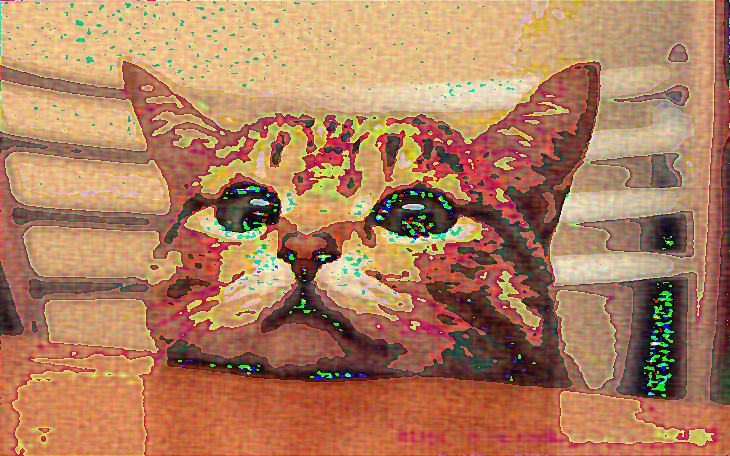

In [15]:
cat_outline

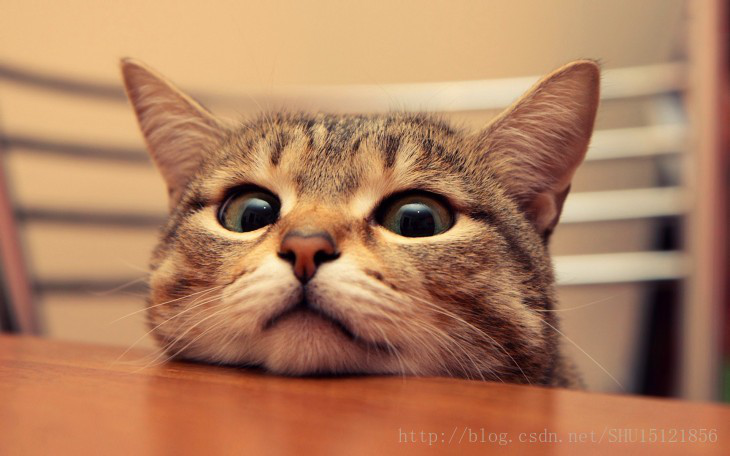

In [49]:
cat

显示图片